# 1. Big Five personality traits
The Big Five personality traits are:

Openness :
People who like to learn new things and enjoy new experiences usually score high in openness. Openness includes traits like being insightful and imaginative and having a wide variety of interests.

Conscientiousness :
People that have a high degree of conscientiousness are reliable and prompt. Traits include being organized, methodic, and thorough.

Extraversion :
Extraverts get their energy from interacting with others, while introverts get their energy from within themselves. Extraversion includes the traits of energetic, talkative, and assertive.

Agreeableness :
These individuals are friendly, cooperative, and compassionate. People with low agreeableness may be more distant. Traits include being kind, affectionate, and sympathetic.

Neuroticism :
Neuroticism is also sometimes called Emotional Stability. This dimension relates to one’s emotional stability and degree of negative emotions. People that score high on neuroticism often experience emotional instability and negative emotions. Traits include being moody and tense.

In [395]:
!pip3 install yellowbrick
!pip install pyqt5
!pip install kneed

zsh:1: no matches found: kneed[plot]


# Step 2: Checking Data¶
### Data Exploration Steps

1. **Import Dataset**


In [237]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


In [346]:
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
data_raw = pd.read_csv('data/big5_data.csv', sep='\t')
# random_row = df.sample(n=1)
# random_row.to_csv('data/test.csv')
data = data_raw.copy()

In [239]:
print('Number of participants: ', len(data))
data.head()

Number of participants:  19719


,race,age,engnat,gender,hand,...,O6,O7,O8,O9,O10
0,3,53,1,1,1,...,1,4,2,5,5
1,13,46,1,2,1,...,3,3,1,3,2
2,1,14,2,2,1,...,1,5,5,5,5
3,3,19,2,2,1,...,2,5,2,5,5
4,11,25,2,2,1,...,1,3,1,5,3


2. **Checking Data Quality:**
    - Is there any missing data?
    - Is there any duplicates?
    - What are the data types?
    - What are the distributions of the data?
    - Do we need to remove or fix any data?

In [240]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
# data.duplicated()
print('duplicated data', data.duplicated().sum())
# data.drop_duplicates()
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  9
duplicated data 0
Number of participants after eliminating missing values:  19710


3. **Basic Understanding of the Dataset:**
    - The columns
    - Size of the datasets
    - What columns are categorical, what columns are numerical
    - Anything else you can think of

In [241]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 19710 entries, 0 to 19718
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   race     19710 non-null  int64 
 1   age      19710 non-null  int64 
 2   engnat   19710 non-null  int64 
 3   gender   19710 non-null  int64 
 4   hand     19710 non-null  int64 
 5   source   19710 non-null  int64 
 6   country  19710 non-null  object
 7   E1       19710 non-null  int64 
 8   E2       19710 non-null  int64 
 9   E3       19710 non-null  int64 
 10  E4       19710 non-null  int64 
 11  E5       19710 non-null  int64 
 12  E6       19710 non-null  int64 
 13  E7       19710 non-null  int64 
 14  E8       19710 non-null  int64 
 15  E9       19710 non-null  int64 
 16  E10      19710 non-null  int64 
 17  N1       19710 non-null  int64 
 18  N2       19710 non-null  int64 
 19  N3       19710 non-null  int64 
 20  N4       19710 non-null  int64 
 21  N5       19710 non-null  int64 
 22  N6 

### Test Questions

#### Extroversion (Questions 1 to 10)

#### Neuroticism (Questions 11 to 20)

#### Agreeableness (Questions 21 to 30)

#### Conscientiousness (Questions 31 to 40)

#### Openness to Experience (Questions 41 to 50)

### Metadata
The remaining 10 columns contain metadata such as the width and height of the user's screen when they were taking these tests.


In [242]:
data.describe()

,race,age,engnat,gender,hand,...,O6,O7,O8,O9,O10
count,19710.000000,1.971000e+04,19710.000000,19710.000000,19710.000000,...,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000
mean,5.322831,5.079020e+04,1.364992,1.616794,1.130188,...,1.794723,4.073059,3.208219,4.133435,4.004972
std,4.018116,7.122898e+06,0.488762,0.499157,0.413748,...,1.068401,0.923498,1.258901,0.982961,0.983643
min,0.000000,1.300000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,...,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,...,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,3.100000e+01,2.000000,2.000000,1.000000,...,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,1.000000e+09,2.000000,3.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000


In [618]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Profiling', html={'style':{'full_width':True}}, minimal = True)
profile.to_file(output_file="data/ProfileReport.html")

/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Step 3: Tidy Data¶
From the above step, we can see that the data is already tidy. There are no duplicates, and the data types are mostly correct.

In [244]:
# Groups and Questions
ext_questions = {'E1' : 'I am the life of the party',
                 'E2' : 'I dont talk a lot',
                 'E3' : 'I feel comfortable around people',
                 'E4' : 'I keep in the background',
                 'E5' : 'I start conversations',
                 'E6' : 'I have little to say',
                 'E7' : 'I talk to a lot of different people at parties',
                 'E8' : 'I dont like to draw attention to myself',
                 'E9' : 'I dont mind being the center of attention',
                 'E10': 'I am quiet around strangers'}

est_questions = {'N1' : 'I get stressed out easily',
                 'N2' : 'I am relaxed most of the time',
                 'N3' : 'I worry about things',
                 'N4' : 'I seldom feel blue',
                 'N5' : 'I am easily disturbed',
                 'N6' : 'I get upset easily',
                 'N7' : 'I change my mood a lot',
                 'N8' : 'I have frequent mood swings',
                 'N9' : 'I get irritated easily',
                 'N10': 'I often feel blue'}

agr_questions = {'A1' : 'I feel little concern for others',
                 'A2' : 'I am interested in people',
                 'A3' : 'I insult people',
                 'A4' : 'I sympathize with others feelings',
                 'A5' : 'I am not interested in other peoples problems',
                 'A6' : 'I have a soft heart',
                 'A7' : 'I am not really interested in others',
                 'A8' : 'I take time out for others',
                 'A9' : 'I feel others emotions',
                 'A10': 'I make people feel at ease'}

csn_questions = {'C1' : 'I am always prepared',
                 'C2' : 'I leave my belongings around',
                 'C3' : 'I pay attention to details',
                 'C4' : 'I make a mess of things',
                 'C5' : 'I get chores done right away',
                 'C6' : 'I often forget to put things back in their proper place',
                 'C7' : 'I like order',
                 'C8' : 'I shirk my duties',
                 'C9' : 'I follow a schedule',
                 'C10' : 'I am exacting in my work'}

opn_questions = {'O1' : 'I have a rich vocabulary',
                 'O2' : 'I have difficulty understanding abstract ideas',
                 'O3' : 'I have a vivid imagination',
                 'O4' : 'I am not interested in abstract ideas',
                 'O5' : 'I have excellent ideas',
                 'O6' : 'I do not have a good imagination',
                 'O7' : 'I am quick to understand things',
                 'O8' : 'I use difficult words',
                 'O9' : 'I spend time reflecting on things',
                 'O10': 'I am full of ideas'}

In [245]:
# Group Names and Columns
EXT = [column for column in data if column.startswith('E')]
EST = [column for column in data if column.startswith('N')]
AGR = [column for column in data if column.startswith('A')]
CSN = [column for column in data if column.startswith('C')]
OPN = [column for column in data if column.startswith('O')]

In [246]:
positively_keyed = ['E1', 'E3', 'E5', 'E7', 'E9',
                    'N1', 'N3', 'N5', 'N6', 'N7', 
                    'E8', 'E9', 'E10',
                    'A2', 'A4', 'A6', 'A8', 'A9', 'A10',
                    'C1', 'C3', 'C5', 'C7', 'C9', 'C10', 
                    'O1', 'O3', 'O5', 'O7', 'O8', 'O9', 
                    'O10']

negatively_keyed = ['E2', 'E4', 'E6', 'E8', 'E10',
                    'N2', 'N4',
                    'A1', 'A3', 'A5', 'A7', 
                    'C2', 'C4', 'C6', 'C8', 
                    'O2', 'O4', 'O6']

In [247]:
traits_df = pd.DataFrame()

# Calculate positively keyed items
traits_df["EXT_pos"] = sum(data[key] for key in positively_keyed if key.startswith('E'))
traits_df["NEU_pos"] = sum(data[key] for key in positively_keyed if key.startswith('N'))
traits_df["AGR_pos"] = sum(data[key] for key in positively_keyed if key.startswith('A'))
traits_df["CSN_pos"] = sum(data[key] for key in positively_keyed if key.startswith('C'))
traits_df["OPN_pos"] = sum(data[key] for key in positively_keyed if key.startswith('O'))

# Calculate negatively keyed items
traits_df["EXT_neg"] = sum(data[key] for key in negatively_keyed if key.startswith('E'))
traits_df["NEU_neg"] = sum(data[key] for key in negatively_keyed if key.startswith('N'))
traits_df["AGR_neg"] = sum(data[key] for key in negatively_keyed if key.startswith('A'))
traits_df["CSN_neg"] = sum(data[key] for key in negatively_keyed if key.startswith('C'))
traits_df["OPN_neg"] = sum(data[key] for key in negatively_keyed if key.startswith('O'))

# Combine positively and negatively keyed items
traits_df["EXT"] = traits_df["EXT_pos"] - traits_df["EXT_neg"]
traits_df["NEU"] = traits_df["NEU_pos"] - traits_df["NEU_neg"]
traits_df["AGR"] = traits_df["AGR_pos"] - traits_df["AGR_neg"]
traits_df["CSN"] = traits_df["CSN_pos"] - traits_df["CSN_neg"]
traits_df["OPN"] = traits_df["OPN_pos"] - traits_df["OPN_neg"]

traits_df.describe()
# Drop intermediate columns
traits_df.drop(columns=["EXT_pos", "EXT_neg", "NEU_pos", "NEU_neg", "AGR_pos", "AGR_neg", "CSN_pos", "CSN_neg", "OPN_pos", "OPN_neg"], inplace=True)

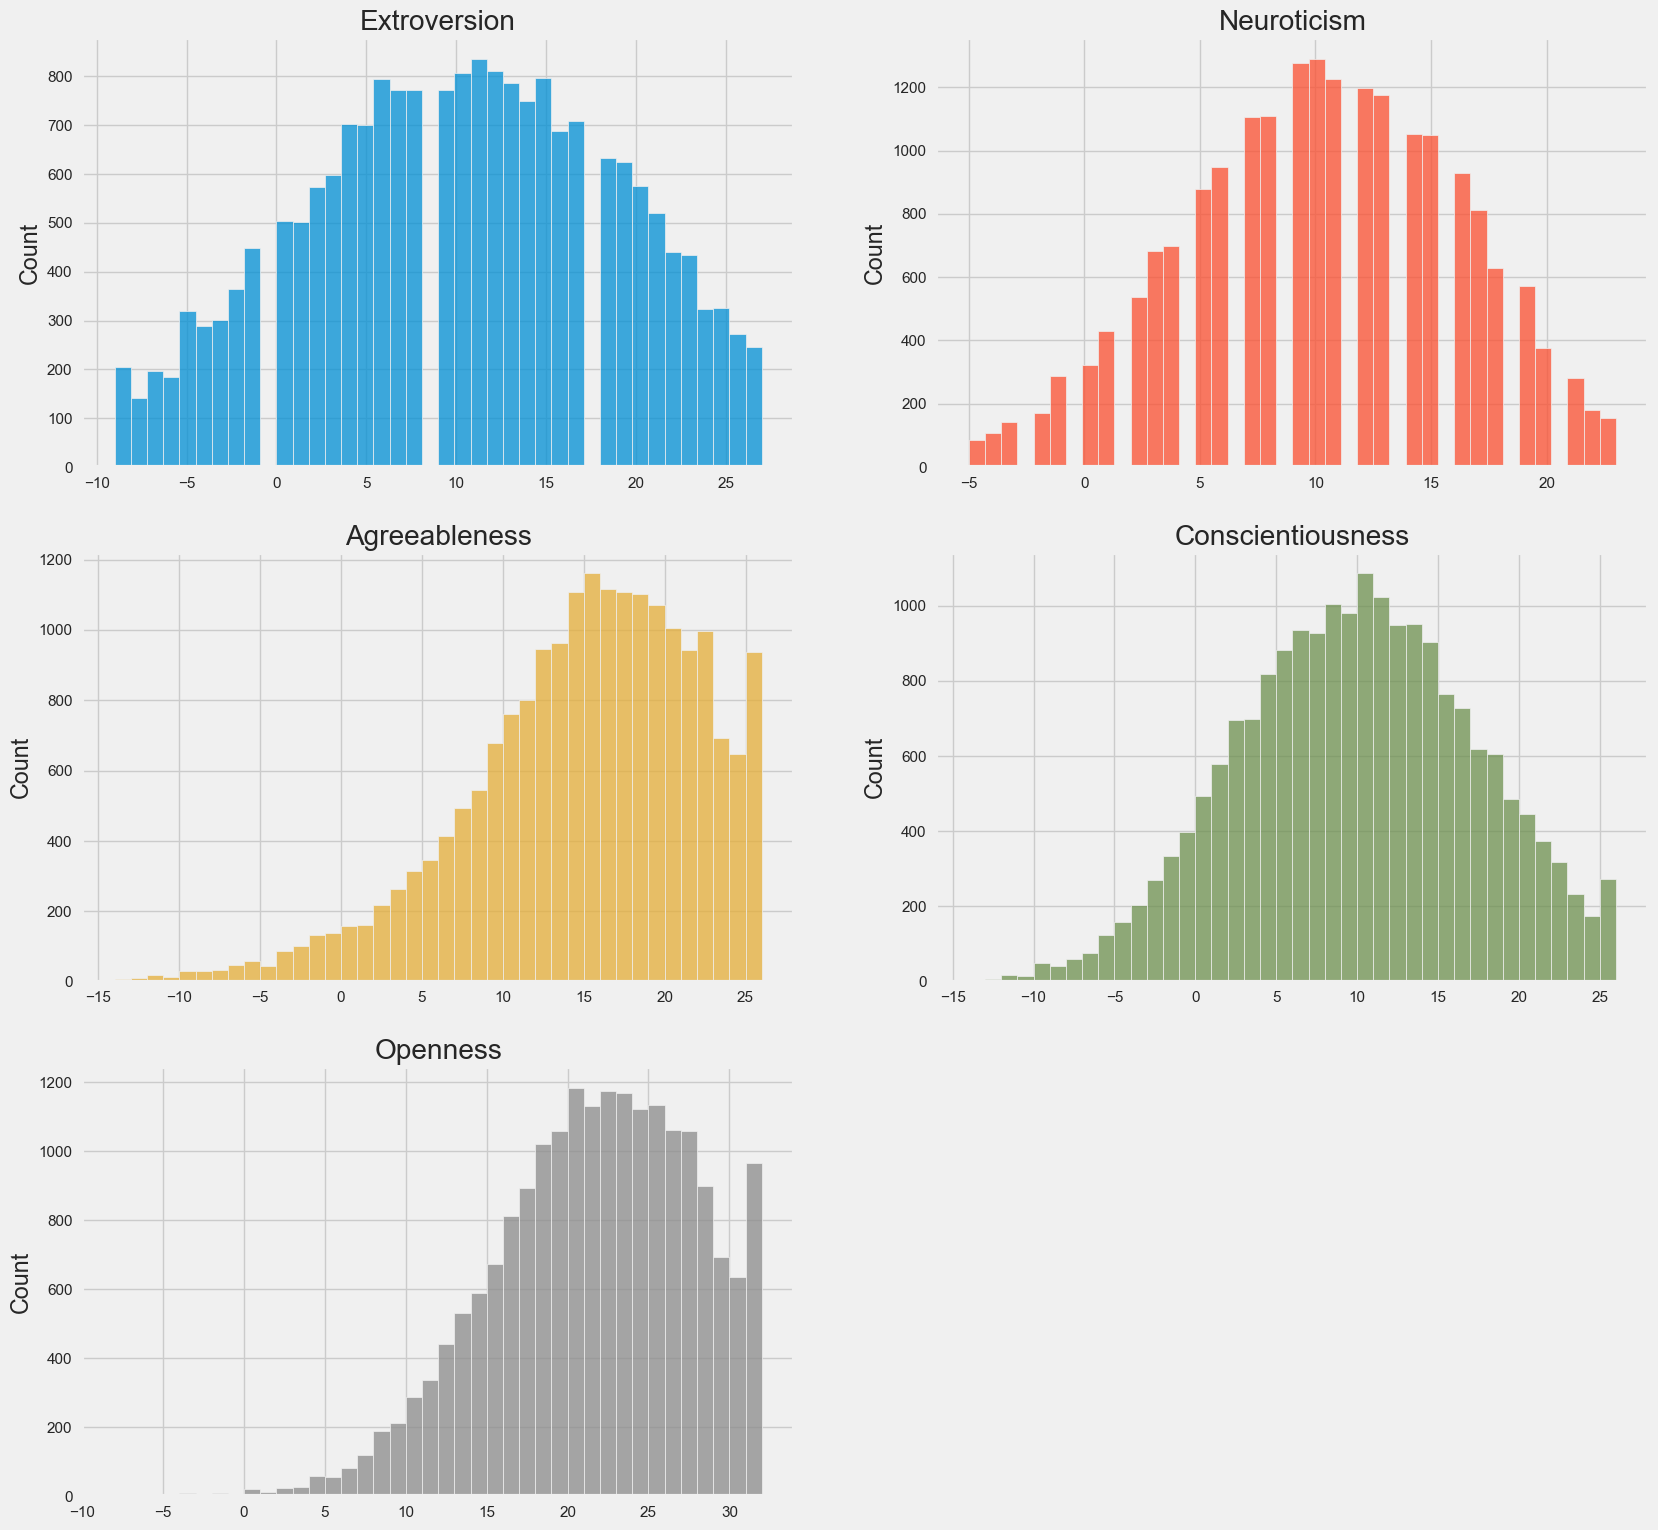

In [248]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(18, 18))
sns.histplot(traits_df["EXT"], bins=40, kde=False, ax=axs[0, 0], color=sns.color_palette()[0]).set_title("Extroversion")
sns.histplot(traits_df["NEU"], bins=40, kde=False, ax=axs[0, 1], color=sns.color_palette()[1]).set_title("Neuroticism")
sns.histplot(traits_df["AGR"], bins=40, kde=False, ax=axs[1, 0], color=sns.color_palette()[2]).set_title("Agreeableness")
sns.histplot(traits_df["CSN"], bins=40, kde=False, ax=axs[1, 1], color=sns.color_palette()[3]).set_title("Conscientiousness")
sns.histplot(traits_df["OPN"], bins=40, kde=False, ax=axs[2, 0], color=sns.color_palette()[4]).set_title("Openness")

fig.delaxes(axs[2, 1])
for ax in axs.flat:
    ax.set(xlabel=None, ylabel="Count")

plt.show()

### What the Histograms Show

The histograms generated from the `traits_df` DataFrame represent the distribution of scores for each of the Big Five personality traits: Extroversion, Neuroticism, Agreeableness, Conscientiousness, and Openness.

1. **Extroversion**: This histogram shows the distribution of scores for the Extroversion trait. Higher values indicate a tendency towards being outgoing, sociable, and energetic, while lower values indicate introversion and a preference for solitude or quieter activities.

2. **Neuroticism**: This histogram displays the distribution of scores for the Neuroticism trait. Higher values indicate a tendency towards experiencing negative emotions such as anxiety, depression, and vulnerability to stress, while lower values indicate emotional stability and resilience.

3. **Agreeableness**: This histogram illustrates the distribution of scores for the Agreeableness trait. Higher values suggest a disposition towards kindness, empathy, cooperation, and a focus on maintaining social harmony, while lower values may indicate a more competitive or detached nature.

4. **Conscientiousness**: This histogram showcases the distribution of scores for the Conscientiousness trait. Higher values signify traits such as organization, responsibility, reliability, and self-discipline, while lower values may indicate impulsiveness, disorganization, or a lack of focus.

5. **Openness**: This histogram exhibits the distribution of scores for the Openness trait. Higher values indicate a preference for novelty, creativity, curiosity, and a willingness to explore new ideas and experiences, while lower values suggest a preference for tradition, routine, and familiarity.

By examining the shape and spread of each histogram, you can gain insights into the distribution of these personality traits within the population or sample under consideration.


In [249]:
correlation = traits_df.corr()
print(correlation)

          EXT       NEU       AGR       CSN       OPN
EXT  1.000000 -0.232403  0.336128  0.108356  0.178006
NEU -0.232403  1.000000 -0.057328 -0.225184 -0.113440
AGR  0.336128 -0.057328  1.000000  0.175829  0.116450
CSN  0.108356 -0.225184  0.175829  1.000000  0.086123
OPN  0.178006 -0.113440  0.116450  0.086123  1.000000


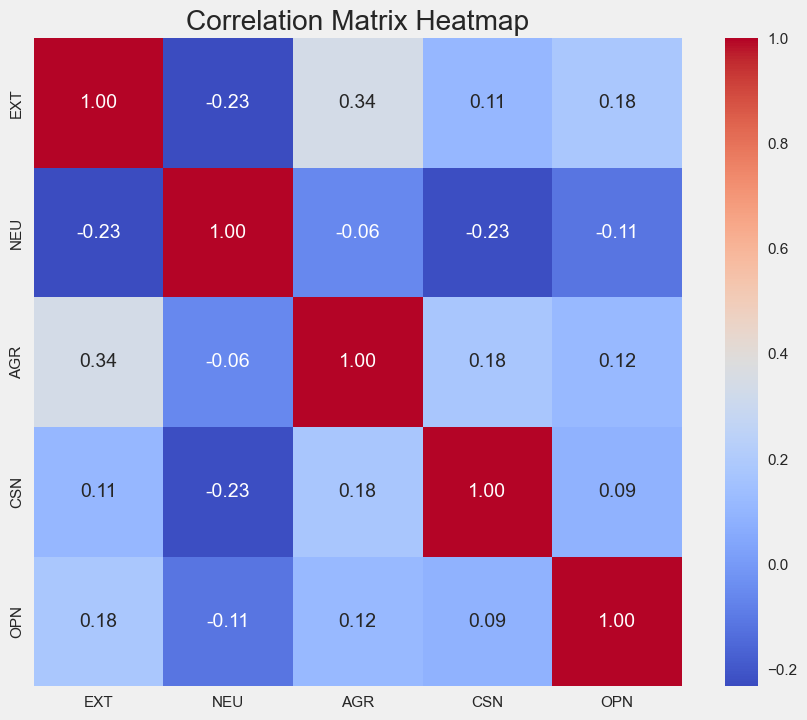

In [250]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Exploratory Data Analysis¶


In [251]:
# Defining a function to show the questions as well as answers distribution

In [252]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

## Q&As Related to Extroversion Personality¶
1. **EXT1:** I am the life of the party.
2. **EXT2:** I don't talk a lot.
3. **EXT3:** I feel comfortable around people.
4. **EXT4:** I keep in the background.
5. **EXT5:** I start conversations.
6. **EXT6:** I have little to say.
7. **EXT7:** I talk to a lot of different people at parties.
8. **EXT8:** I don't like to draw attention to myself.
9. **EXT9:** I don't mind being the center of attention.
10. **EXT10:** I am quiet around strangers.

Q&As Related to Extroversion Personality


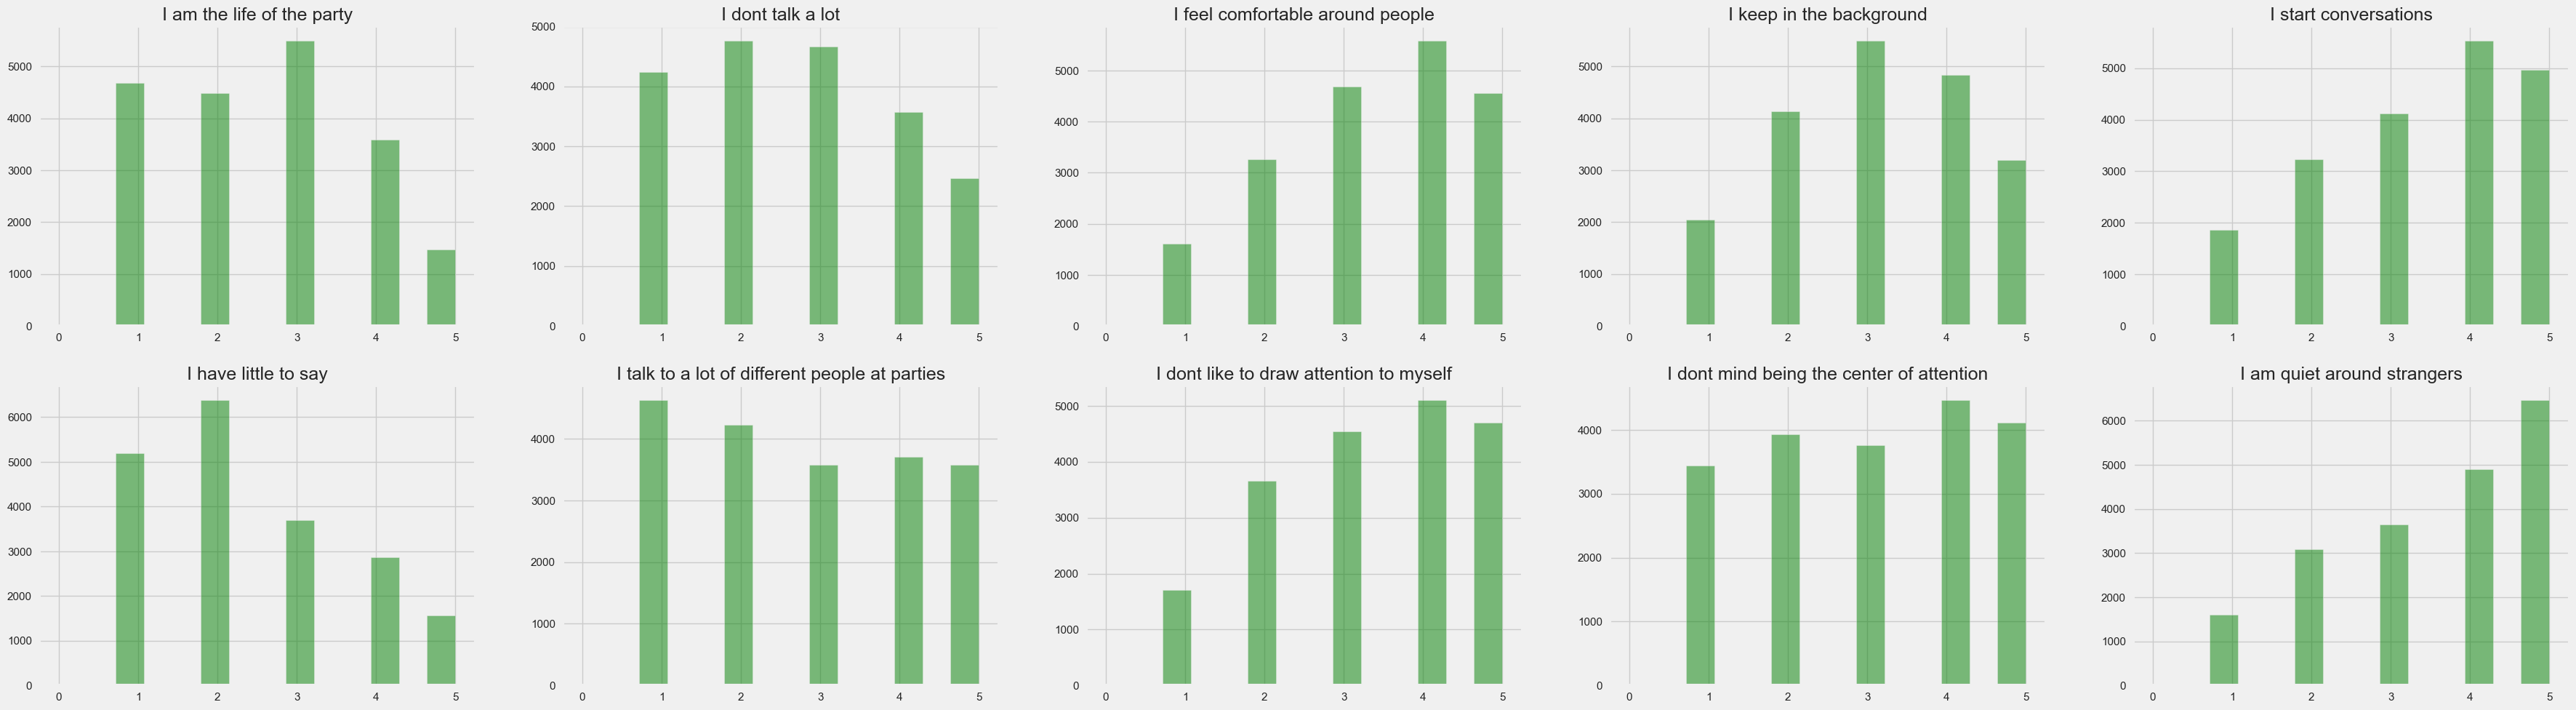

In [253]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'green')

## Q&As Related to Neuroticism Personality¶

1. **EST1:** I get stressed out easily.
2. **EST2:** I am relaxed most of the time.
3. **EST3:** I worry about things.
4. **EST4:** I seldom feel blue.
5. **EST5:** I am easily disturbed.
6. **EST6:** I get upset easily.
7. **EST7:** I change my mood a lot.
8. **EST8:** I have frequent mood swings.
9. **EST9:** I get irritated easily.
10. **EST10:** I often feel blue.


Q&As Related to Neuroticism Personality


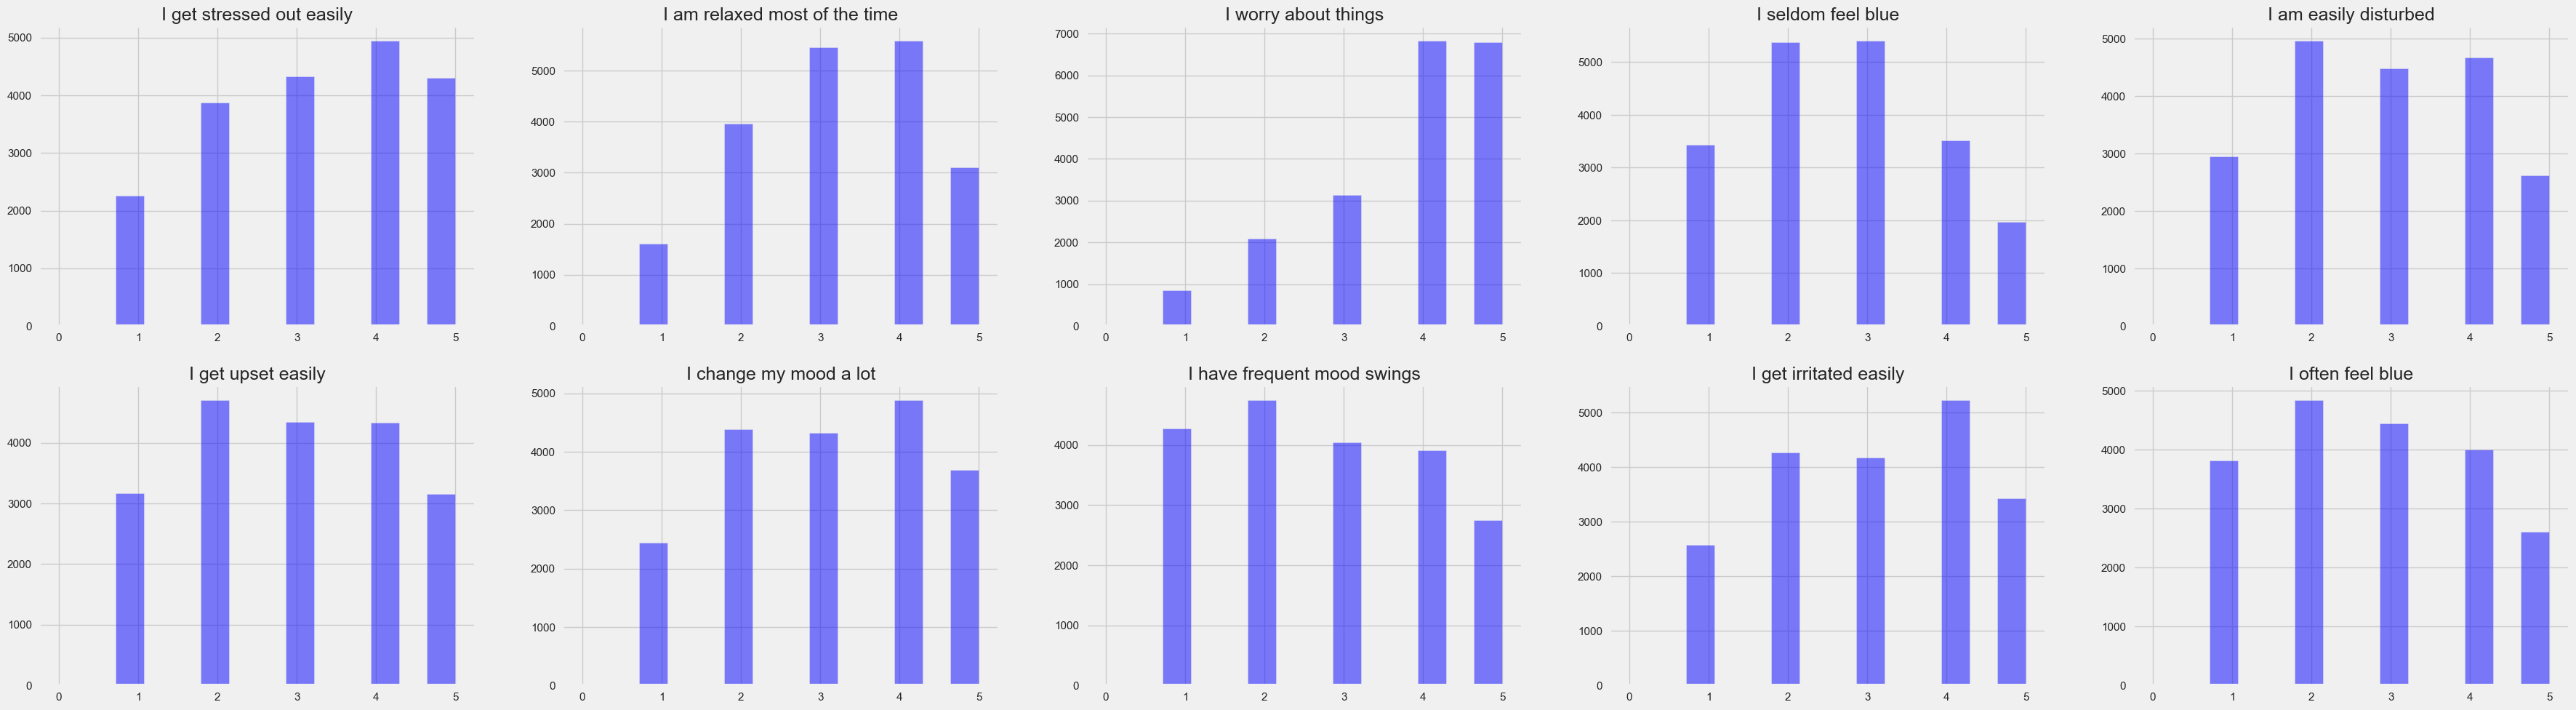

In [254]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'blue')

## Q&As Related to Agreeable Personality¶
1. **AGR1:** I feel little concern for others.
2. **AGR2:** I am interested in people.
3. **AGR3:** I insult people.
4. **AGR4:** I sympathize with others' feelings.
5. **AGR5:** I am not interested in other people's problems.
6. **AGR6:** I have a soft heart.
7. **AGR7:** I am not really interested in others.
8. **AGR8:** I take time out for others.
9. **AGR9:** I feel others' emotions.
10. **AGR10:** I make people feel at ease.


Q&As Related to Agreeable Personality


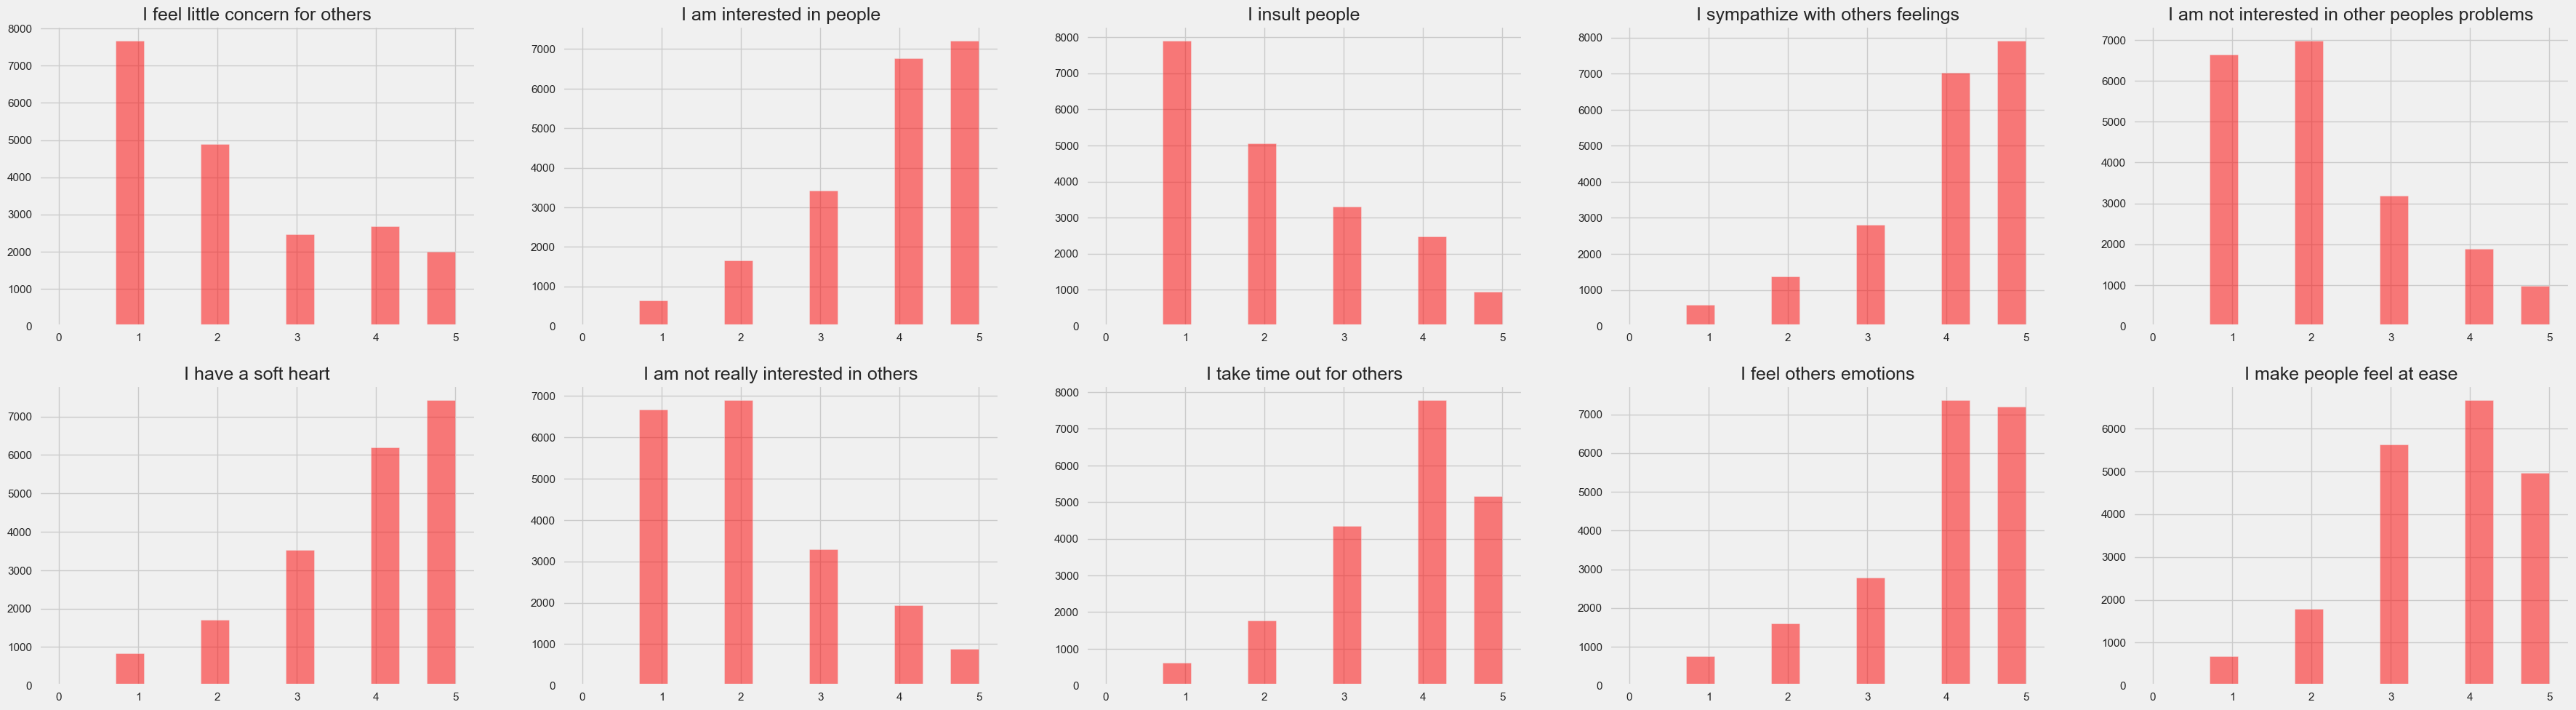

In [255]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions,'red')

## Q&As Related to Conscientious Personality¶
1. **CSN1:** I am always prepared.
2. **CSN2:** I leave my belongings around.
3. **CSN3:** I pay attention to details.
4. **CSN4:** I make a mess of things.
5. **CSN5:** I get chores done right away.
6. **CSN6:** I often forget to put things back in their proper place.
7. **CSN7:** I like order.
8. **CSN8:** I shirk my duties.
9. **CSN9:** I follow a schedule.
10. **CSN10:** I am exacting in my work.


Q&As Related to Conscientious Personality


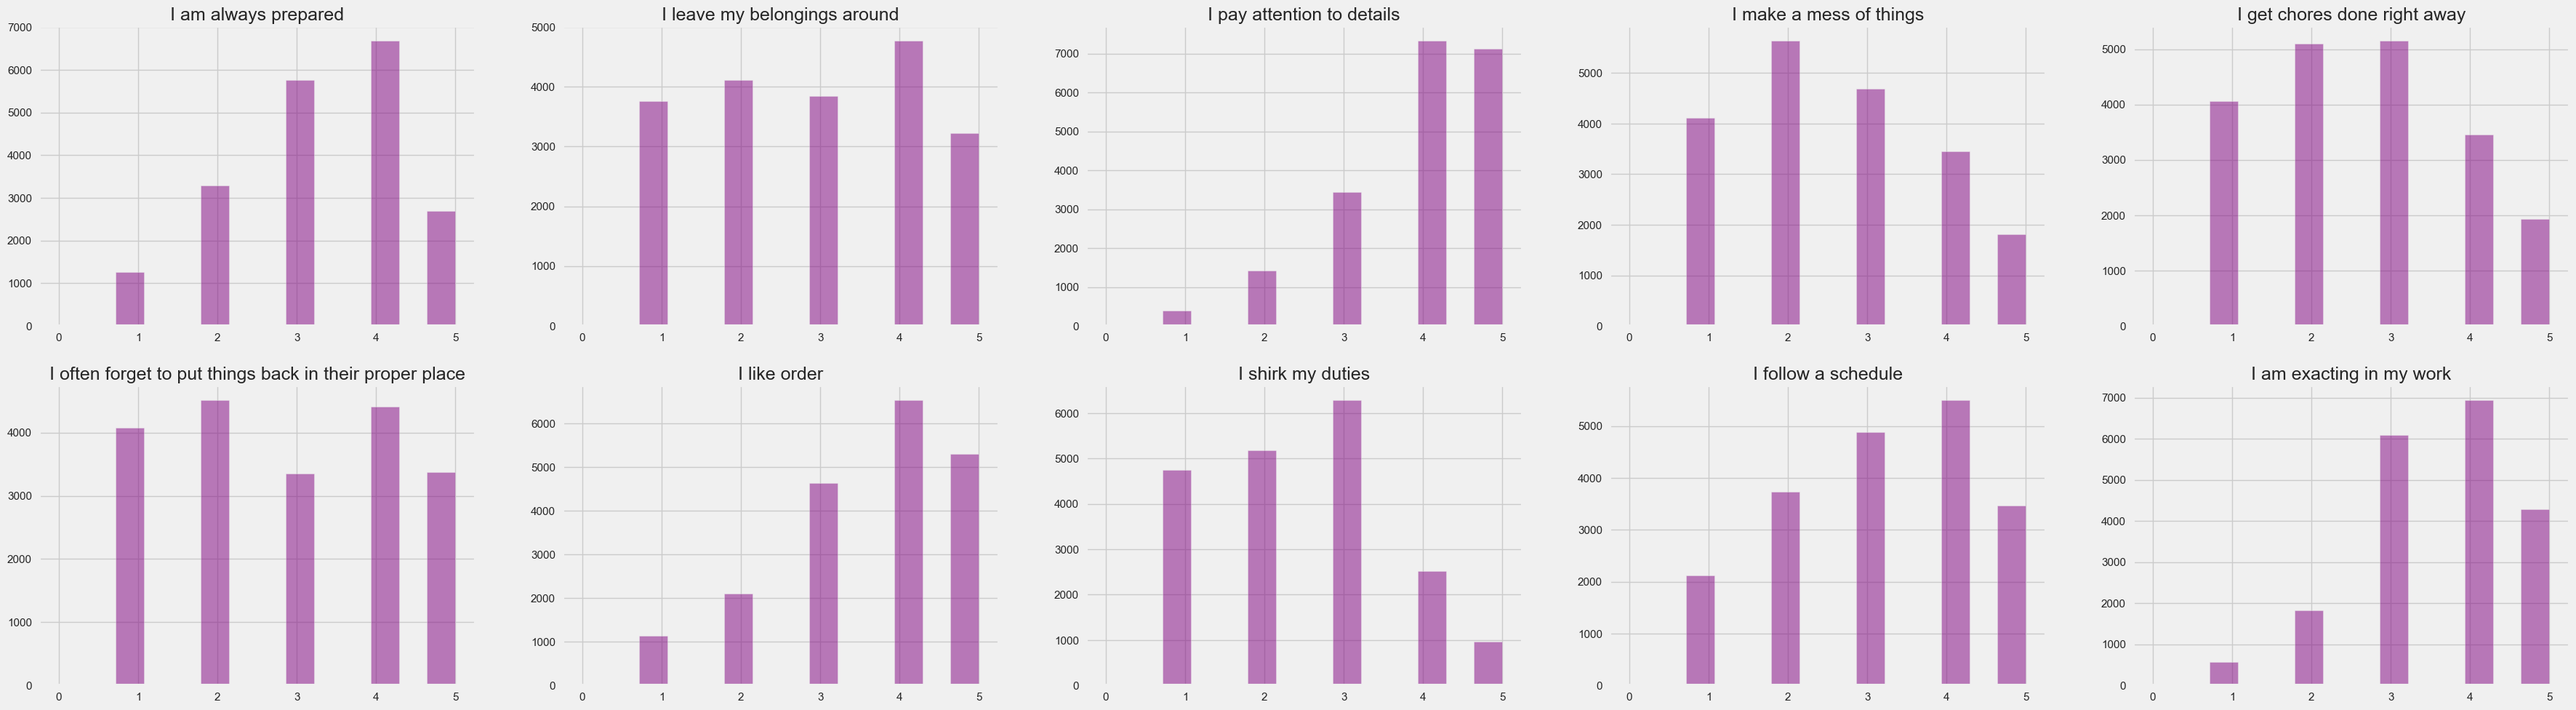

In [256]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

## Q&As Related to Open Personality¶
1. **OPN1:** I have a rich vocabulary.
2. **OPN2:** I have difficulty understanding abstract ideas.
3. **OPN3:** I have a vivid imagination.
4. **OPN4:** I am not interested in abstract ideas.
5. **OPN5:** I have excellent ideas.
6. **OPN6:** I do not have a good imagination.
7. **OPN7:** I am quick to understand things.
8. **OPN8:** I use difficult words.
9. **OPN9:** I spend time reflecting on things.
10. **OPN10:** I am full of ideas.


Q&As Related to Open Personality


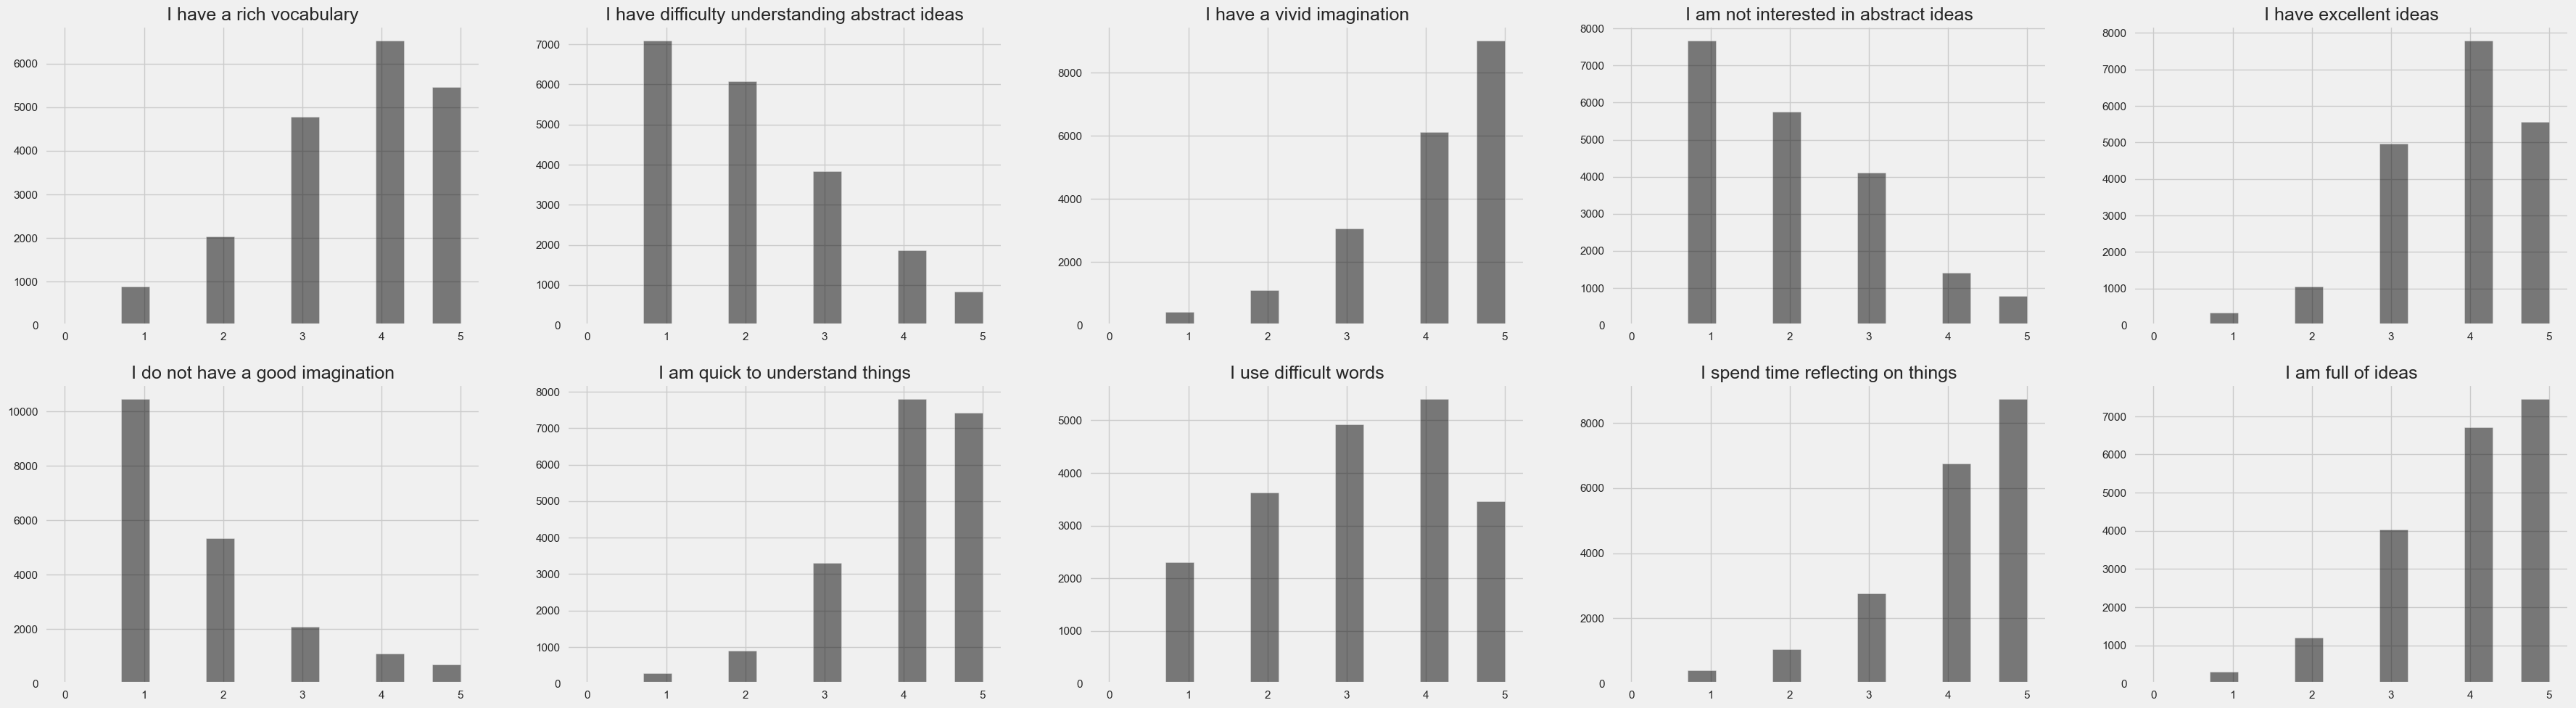

In [257]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'black')

### K-means
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

Now, we will run a k-means algorithm with number of clusters, batch size, random state and maximum iteration as a parameters.

Here, number of clusters are 5. We can change it to any number
Our batch size is 100 i.e. amount of data trained at once

In [449]:
df = data.iloc[:, 7:57]

sample_df = df.copy()

sample_df.head()

,E1,E2,E3,E4,E5,...,O6,O7,O8,O9,O10
0,4,2,5,2,5,...,1,4,2,5,5
1,2,2,3,3,3,...,3,3,1,3,2
2,5,1,1,4,5,...,1,5,5,5,5
3,2,5,2,4,3,...,2,5,2,5,5
4,3,1,3,3,3,...,1,3,1,5,3


# Choosing the Appropriate Number of Clustersµ

In [450]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 100,
    "random_state": 42,
}


In [451]:
wcss = []
for k in range(1, 11):  # Choose a suitable range for k
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sample_df)  # Replace 'data' with your dataset
    wcss.append(kmeans.inertia_)
print(wcss)

[1405575.0696282773, 1246411.4467259299, 1183672.0375460451, 1139605.7031164696, 1111622.3409173442, 1090543.5508536522, 1070225.158238394, 1054879.034415722, 1041275.9003499548, 1029409.9020918645]


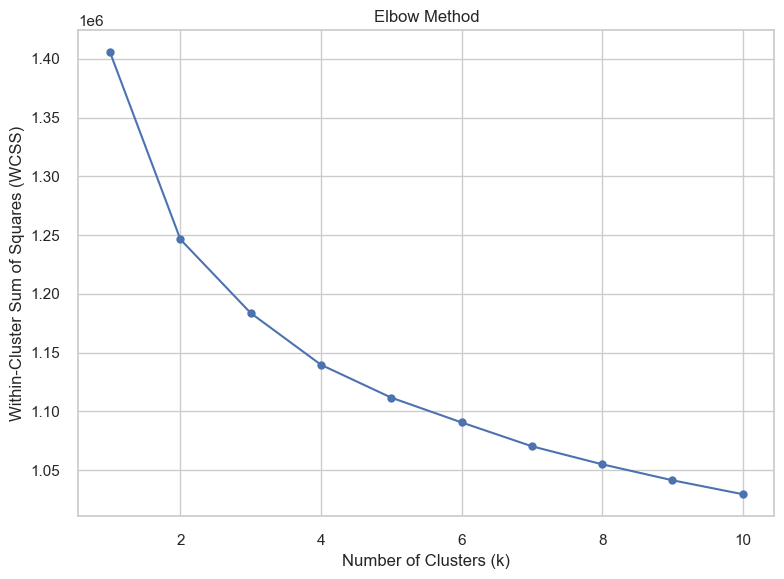

In [452]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

In [453]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), wcss, curve="convex", direction="decreasing"
)

kl.elbow


4

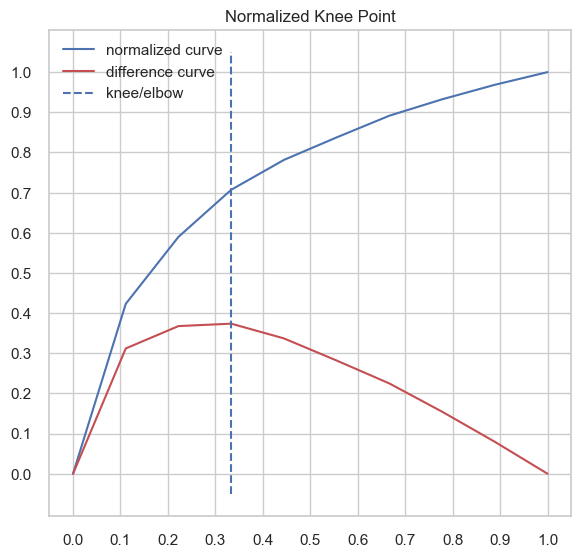

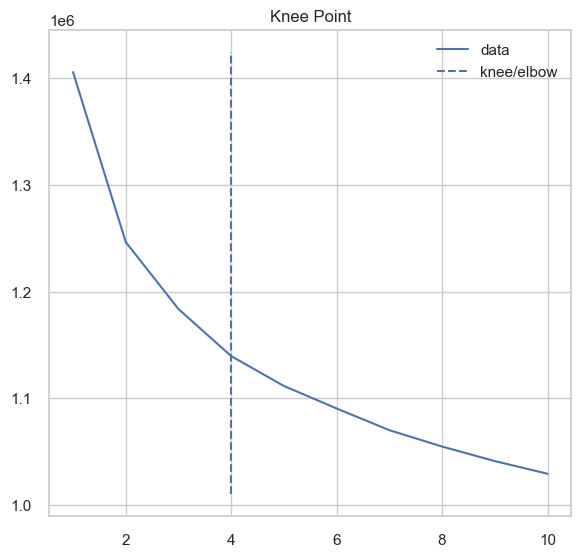

In [454]:
# Normalized data, normalized knee, and normalized distance curve.
kl.plot_knee_normalized()
kl.plot_knee()

# This time, instead of computing SSE, compute the silhouette coefficient:

In [455]:
sample_df.head()

,E1,E2,E3,E4,E5,...,O6,O7,O8,O9,O10
0,4,2,5,2,5,...,1,4,2,5,5
1,2,2,3,3,3,...,3,3,1,3,2
2,5,1,1,4,5,...,1,5,5,5,5
3,2,5,2,4,3,...,2,5,2,5,5
4,3,1,3,3,3,...,1,3,1,5,3


In [456]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(sample_df)
    score = silhouette_score(sample_df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [457]:
# Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score

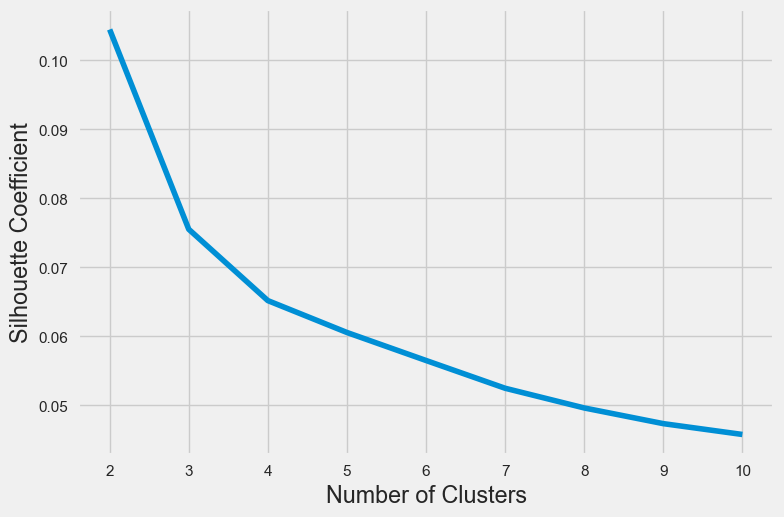

In [458]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

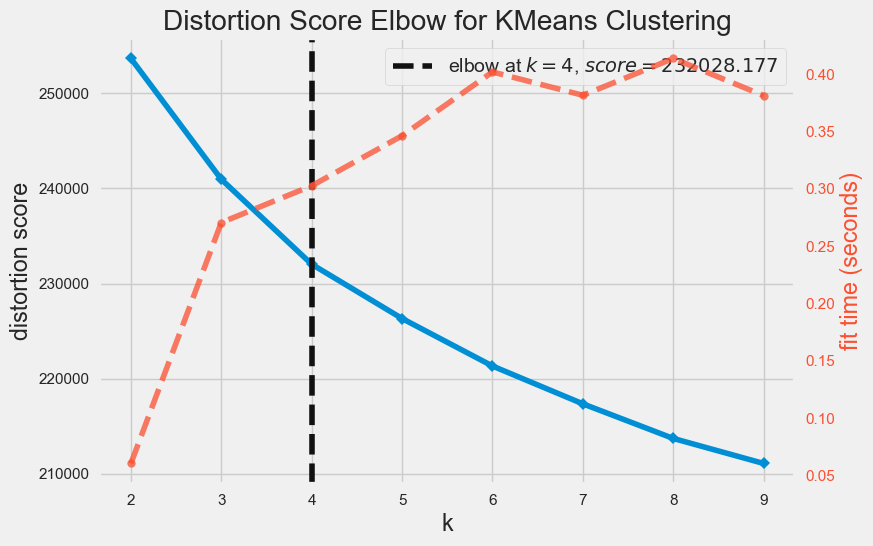

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [459]:
# Visualize the elbow
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

X = sample_df
columns = list(X.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(X)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:4000]

df_sample = sample_df[:4000]
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_sample)
visualizer.poof()

### PCA
Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.
PCA is a versatile tool in the data scientist's toolbox, providing benefits in dimensionality reduction, feature extraction, visualization, noise reduction, and preprocessing, ultimately aiding in better understanding and analysis of complex datasets.

In [461]:
df_sample.describe()

,E1,E2,E3,E4,E5,...,O6,O7,O8,O9,O10
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.655500,2.773750,3.453000,3.157000,3.452500,...,1.795000,4.084500,3.185500,4.124000,4.005250
std,1.251084,1.317761,1.247469,1.234598,1.293701,...,1.076459,0.909432,1.279062,0.987607,0.972347
min,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,...,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,4.000000,3.000000,4.000000,...,1.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,...,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000


In [549]:
kmeans_model = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans_model.fit(sample_df)

KMeans(init='random', max_iter=100, n_clusters=4, n_init=10, random_state=42)

In [550]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(sample_df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
predictions = kmeans_model.labels_

df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-8.988247,2.854421,1
1,1.878859,3.631014,0
2,0.541513,-3.173223,2
3,5.157970,-2.793150,3
4,-1.208350,-0.791576,2


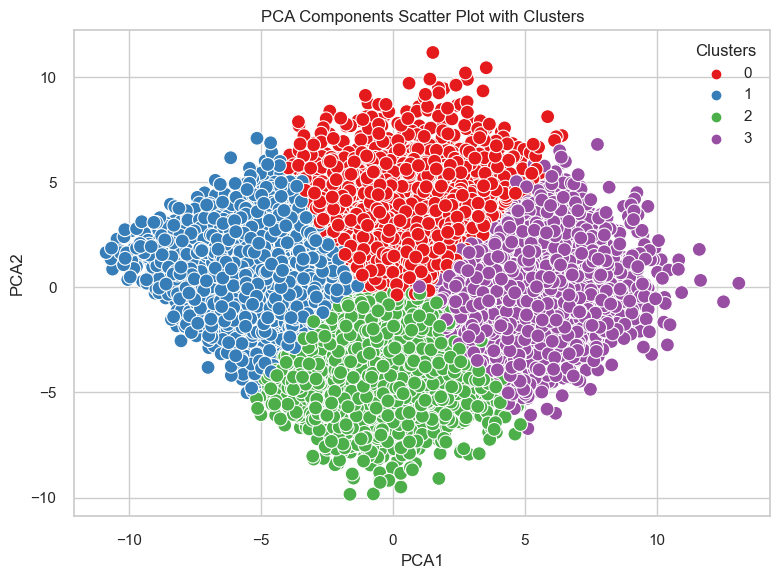

In [551]:
# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Clusters', data=df_pca, palette='Set1', s=100)
plt.title('PCA Components Scatter Plot with Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Clusters')
plt.show()


# Evaluating Clustering Performance Using Advanced Techniques

In [552]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    sample_df, kmeans_model.labels_
)


In [553]:
# aka Silhouette Coefficient is an evaluation metric that results in the range of -1 to 1. 
# A score near 1 signifies the best importance that the data point is very compact within the cluster to 
# which it belongs and far away from the other clusters. 
# The score near -1 signifies the least or worst importance of the data point. 
# A score near 0 signifies overlapping clusters. 

In [554]:
kmeans_silhouette

0.06519269930303889

In [555]:
# Davies-Bouldin Index score is defined as the average similarity measure of each cluster 
# with its most similar cluster, where similarity is the ratio of within-cluster distances 
# to between-cluster distances. Thus, clusters that are farther apart and less dispersed will 
# result in a better score. The minimum score is 0, with lower values indicating better clustering.

In [556]:
from sklearn.metrics import davies_bouldin_score 
  
dbs = davies_bouldin_score(sample_df, kmeans_model.labels_) 
print(dbs)

2.8949449588161857


In [558]:
print(kmeans_model.inertia_)

1139605.7031164696


In [557]:
sample_df.head()

,E1,E2,E3,E4,E5,...,O6,O7,O8,O9,O10
0,4,2,5,2,5,...,1,4,2,5,5
1,2,2,3,3,3,...,3,3,1,3,2
2,5,1,1,4,5,...,1,5,5,5,5
3,2,5,2,4,3,...,2,5,2,5,5
4,3,1,3,3,3,...,1,3,1,5,3


In [563]:
from collections import Counter

cluster_labels = kmeans_model.labels_
counter = Counter(cluster_labels)

print(counter)

Counter({2: 5314, 0: 5274, 3: 4590, 1: 4541})


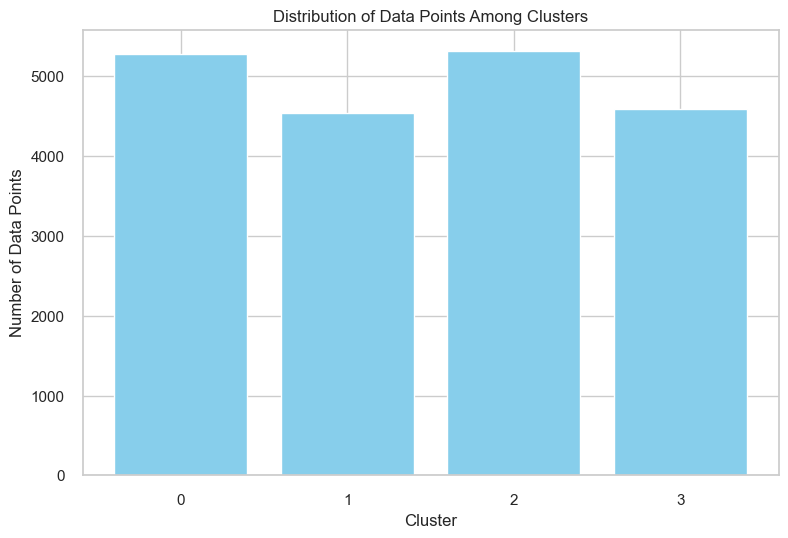

In [564]:
# Plotting the graph
# Count the number of data points in each cluster
counter = Counter(cluster_labels)

# Extract cluster labels and counts
clusters = list(counter.keys())
counts = list(counter.values())

# Plot the bar graph
plt.bar(clusters, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Among Clusters')
plt.xticks(clusters)
plt.show()

In [598]:
# Summing up the different questions groups
col_list = list(sample_df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = sample_df[ext].sum(axis=1)/10
data_sums['neurotic'] = sample_df[neu].sum(axis=1)/10
data_sums['agreeable'] = sample_df[agr].sum(axis=1)/10
data_sums['conscientious'] = sample_df[csn].sum(axis=1)/10
data_sums['open'] = sample_df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.049071,2.719492,3.090994,3.079067,3.238055
1,3.136622,2.466417,3.243471,3.137018,3.351178
2,3.134419,3.482650,3.318065,3.225179,3.371283
3,2.981765,3.700370,3.166057,3.177712,3.295926


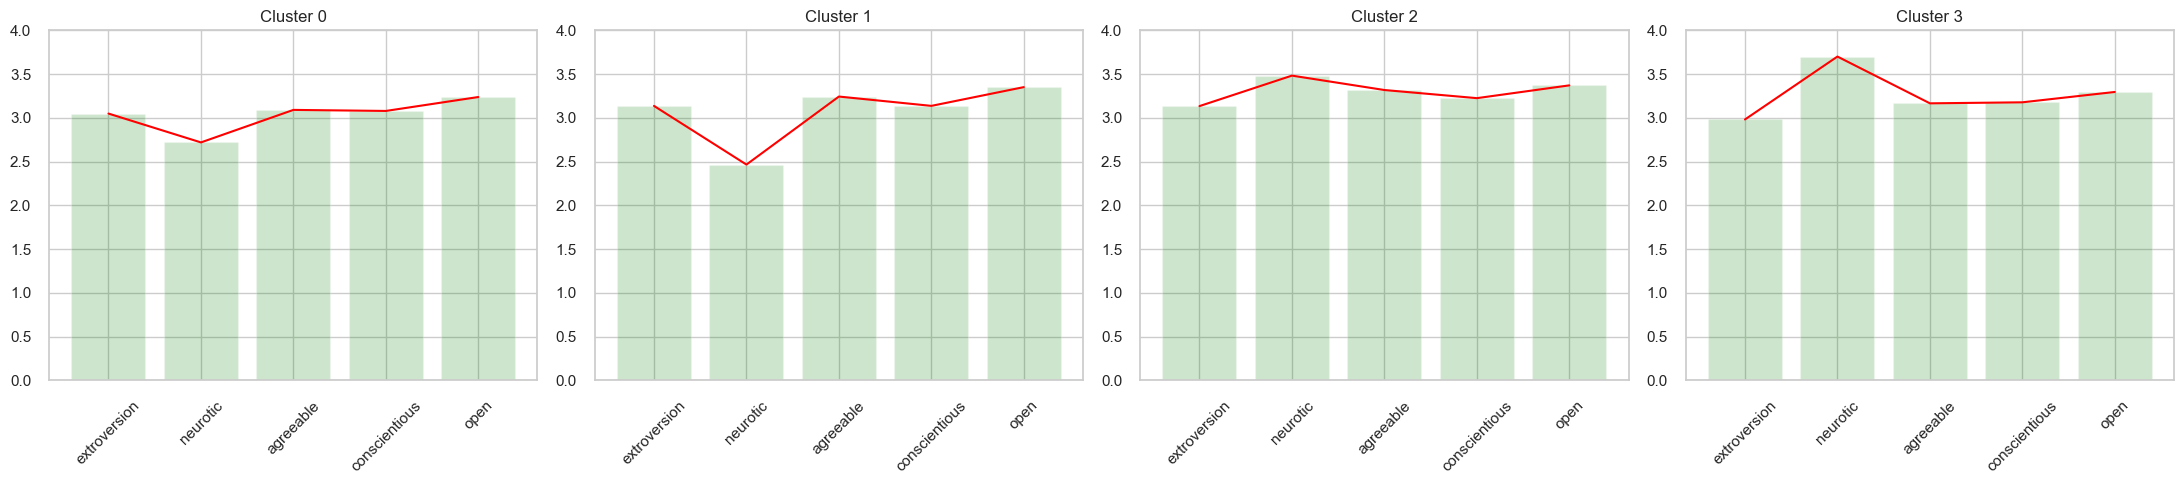

In [595]:
clusters = kmeans_model.labels_


# Group by clusters and calculate the mean
dataclusters = data_sums.groupby('clusters').mean()

# Plot the graph
plt.figure(figsize=(22, 5))
for i in range(0, len(dataclusters)):  # Adjust the loop to iterate over the correct number of clusters
    plt.subplot(1, len(dataclusters), i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 4)  # Adjust y-axis limit if needed

plt.tight_layout()
plt.show()

# Let us now visualize the mean for each of our 5 personality clusters:

In [614]:
my_data = pd.read_csv('data/test.csv')
# my_data = my_data.reset_index(drop=True, inplace=True)
my_data

,E1,E2,E3,E4,E5,...,O6,O7,O8,O9,O10
0,5,3,3,2,5,...,2,4,2,5,2


In [615]:
my_personality = kmeans_model.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [2]


Sum of my question groups


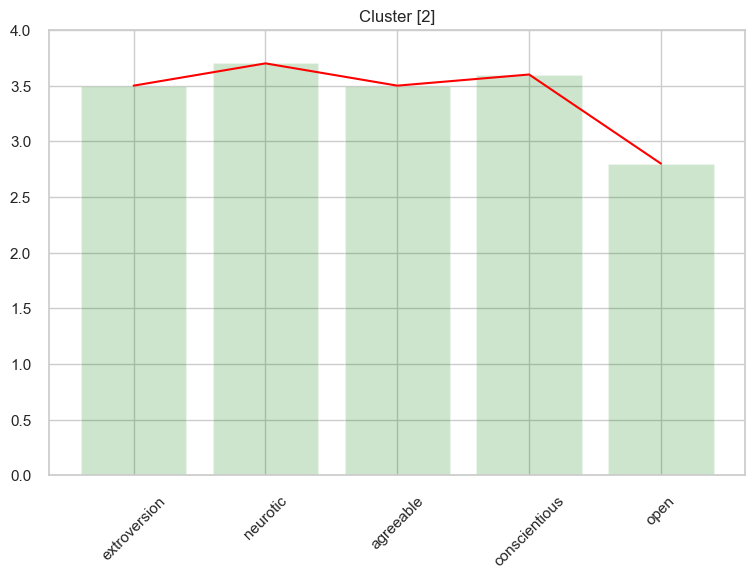

In [616]:
col_list = list(my_data)
ext = col_list[0:10]
neu = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[neu].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title(f'Cluster {my_personality}')
plt.xticks(rotation=45)
plt.ylim(0,4);

In [617]:
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.5,3.7,3.5,3.6,2.8,2
